In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, HashingVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR, SVC
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV, LinearRegression, Ridge, ElasticNet
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
font2 = {'size': 20,'weight': 'normal'} # This code is so as to adjust the size of character among the axis


data = pd.read_csv("toxiccomments_sample_submission.csv")
features = data["id"]
label = data["prediction"]
print("len1 ",len(features) )
print("len1 ", len(label))
# for i in range(len(data)):
#     features.iloc[i] = str(features[i])
#     if label.iloc[i] == "TRUE":
#         label.iloc[i] = 1
#     else:
#         label.iloc[i] = 0


has = HashingVectorizer()
features = has.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.5, random_state=0)


len1  153164
len1  153164


Lasso regression model mean absolute error： 0.4996121892754003
Lasso regression model mean squared error ： 0.24980615305107545
Lasso regression model median absolute error： 0.4860729121610042
Lasso regression model explained variance score： -4.440892098500626e-16
Lasso regression model r2 score： -7.042100236276383e-11


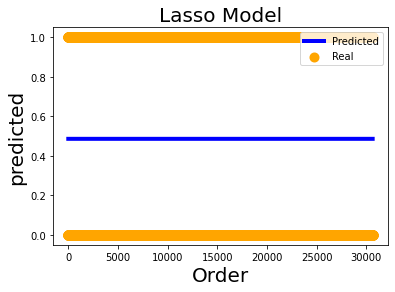

Linear regression model mean absolute error： 0.5019807263892334
Linear regression model mean squared error： 0.27709606518629176
Linear regression model median absolute error： 0.4787843479949512
Linear regression model explained variance score： -0.10904778187592212
Linear regression model r2 score： -0.10924435535881316


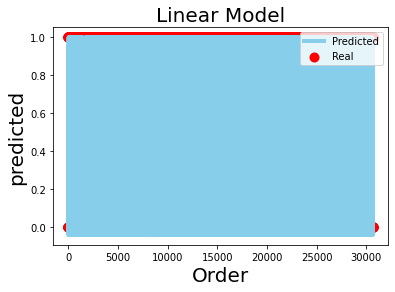

ridge regression model mean absolute error： 0.5001175250527342
ridge regression model mean squared error： 0.25330028293883333
ridge regression model median absolute error： 0.48578338025620155
ridge regression model explained variance score： -0.01398728611317357
ridge regression model r2 score： -0.013987365254694684


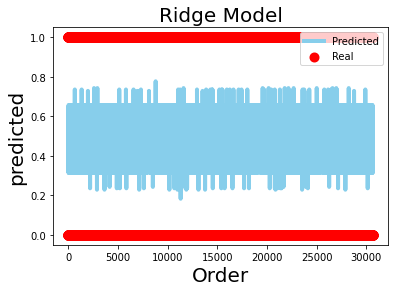

In [7]:
lasso = Lasso(alpha=2, normalize=True)       #Revoke the model Lasso
results_lasso = lasso.fit(X_train, y_train)     #Fit the train dataset
y_predict = lasso.predict(X_test)               #Predict the result by utilizing the Lasso model

print('Lasso regression model mean absolute error：',mean_absolute_error(y_test,y_predict))
print('Lasso regression model mean squared error ：',mean_squared_error(y_test,y_predict))
print('Lasso regression model median absolute error：',median_absolute_error(y_test,y_predict))
print('Lasso regression model explained variance score：',explained_variance_score(y_test,y_predict))
print('Lasso regression model r2 score：',r2_score(y_test,y_predict))
plt.figure()        #Create a new figure
plt.scatter( range(len(y_test)), y_test, color = "orange", label = "Real", linewidth = 4)   #Plot the real data
plt.plot(range(len(y_test)), y_predict, color = "blue", label = "Predicted", linewidth = 4) #Plot the predicted data
plt.title("Lasso Model", fontdict=font2)    #Set the model title name
plt.xlabel("Order", fontdict= font2)
plt.ylabel("predicted", fontdict= font2)
plt.legend()
plt.show()


X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)

LinearRegression_model = LinearRegression()         #Use the model LinearRegression
LinearRegression_model.fit(X_train, y_train)        #Fit the train dataset
y_predict = LinearRegression_model.predict(X_test)  #Predict the result by utilizing the LinearRegression model
print('Linear regression model mean absolute error：',mean_absolute_error(y_test,y_predict))
print('Linear regression model mean squared error：',mean_squared_error(y_test,y_predict))
print('Linear regression model median absolute error：',median_absolute_error(y_test,y_predict))
print('Linear regression model explained variance score：',explained_variance_score(y_test,y_predict))
print('Linear regression model r2 score：',r2_score(y_test,y_predict))
plt.figure()
plt.scatter( range(len(y_test)), y_test, color = "red", label = "Real", linewidth = 4)          #Plot the real data
plt.plot(range(len(y_test)), y_predict, color = "skyblue", label = "Predicted", linewidth = 4)  #Plot the predicted data
plt.title("Linear Model", fontdict=font2)
plt.xlabel("Order", fontdict= font2)
plt.ylabel("predicted", fontdict= font2)
plt.legend()
plt.show()



ridge = Ridge(alpha=2.0, fit_intercept=True, normalize=False,copy_X=True, max_iter=None, tol=1e-3, solver="auto",
                         random_state=None)
ridge.fit(X_train, y_train)             #Fit the train dataset
y_predict = ridge.predict(X_test)       #Predict the result by utilizing the Ridge model
print('ridge regression model mean absolute error：',mean_absolute_error(y_test,y_predict))
print('ridge regression model mean squared error：',mean_squared_error(y_test,y_predict))
print('ridge regression model median absolute error：',median_absolute_error(y_test,y_predict))
print('ridge regression model explained variance score：',explained_variance_score(y_test,y_predict))
print('ridge regression model r2 score：',r2_score(y_test,y_predict))
plt.figure()
plt.scatter( range(len(y_test)), y_test, color = "red", label = "Real", linewidth = 4)          #Plot the real data
plt.plot(range(len(y_test)), y_predict, color = "skyblue", label = "Predicted", linewidth = 4)  #Plot the predicted data
plt.title("Ridge Model", fontdict=font2)
plt.xlabel("Order", fontdict= font2)
plt.ylabel("predicted", fontdict= font2)
plt.legend()
plt.show()